# 220968280 - Anirudh Swaminathan - DSE A2

## Week 3 - Exercise 1 - mtcars dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_full = pd.DataFrame()
df_full = pd.read_csv("mtcars.csv")

In [4]:
df_full.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_full, test_size=0.2, random_state=42)

### 1. Linear regression on mtcars

In [6]:
data = {
    "x": train['hp'],
    "y": train['mpg']
}
df = pd.DataFrame(data)
df.head()

,x,y
25,66,27.3
12,180,17.3
0,110,21.0
4,175,18.7
16,230,14.7


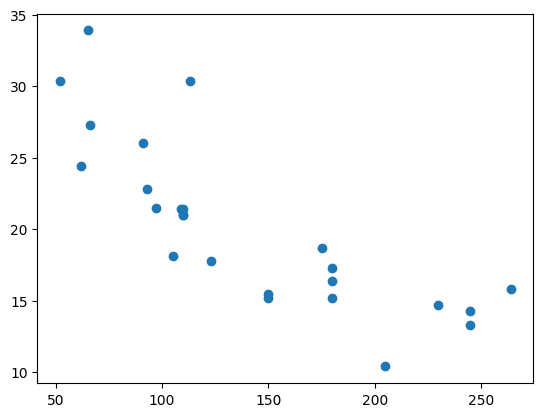

In [7]:
plt.scatter(df['x'], df['y'])

In [8]:
reg = LinearRegression().fit(df[['x']],df['y'])

In [9]:
print(f'{reg.intercept_} + {reg.coef_} * x')

30.948920741121974 + [-0.07678718] * x


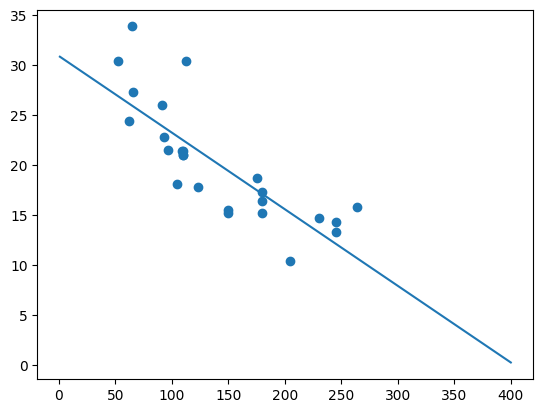

In [10]:
x = np.linspace(1, 400, 200)
y = reg.intercept_ + reg.coef_*x
plt.plot(x, y)
plt.scatter(df['x'], df['y'])

In [11]:
xi = int(input("Enter an integer: "))
y_pred = reg.predict([[xi]])
print(f'the predicted value is:{y_pred}')

the predicted value is:[30.41141045]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


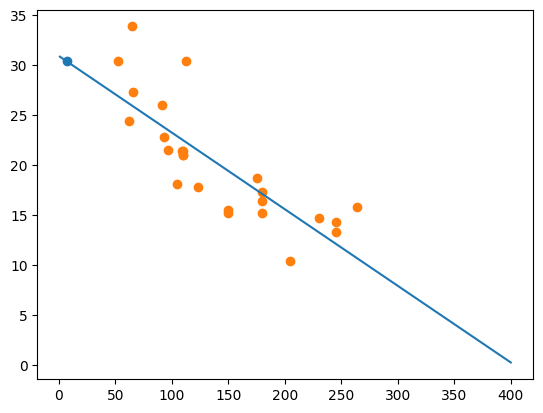

In [12]:
plt.scatter(xi,y_pred)
plt.plot(x, y)
plt.scatter(df['x'],df['y'])

In [14]:
predictions = reg.predict(np.array(test['hp']).reshape((-1,1)))
mse = mean_squared_error(test['mpg'], predictions)
print(f'mse = {mse}')

mse = 24.006401948028003


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 2. Multiple linear regression on mtcars

In [15]:
X = train.drop('mpg', axis=1)
X = X.drop('model', axis=1)
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [16]:
Y = train['mpg']
Y = pd.DataFrame(Y)
Y.head()

,mpg
25,27.3
12,17.3
0,21.0
4,18.7
16,14.7


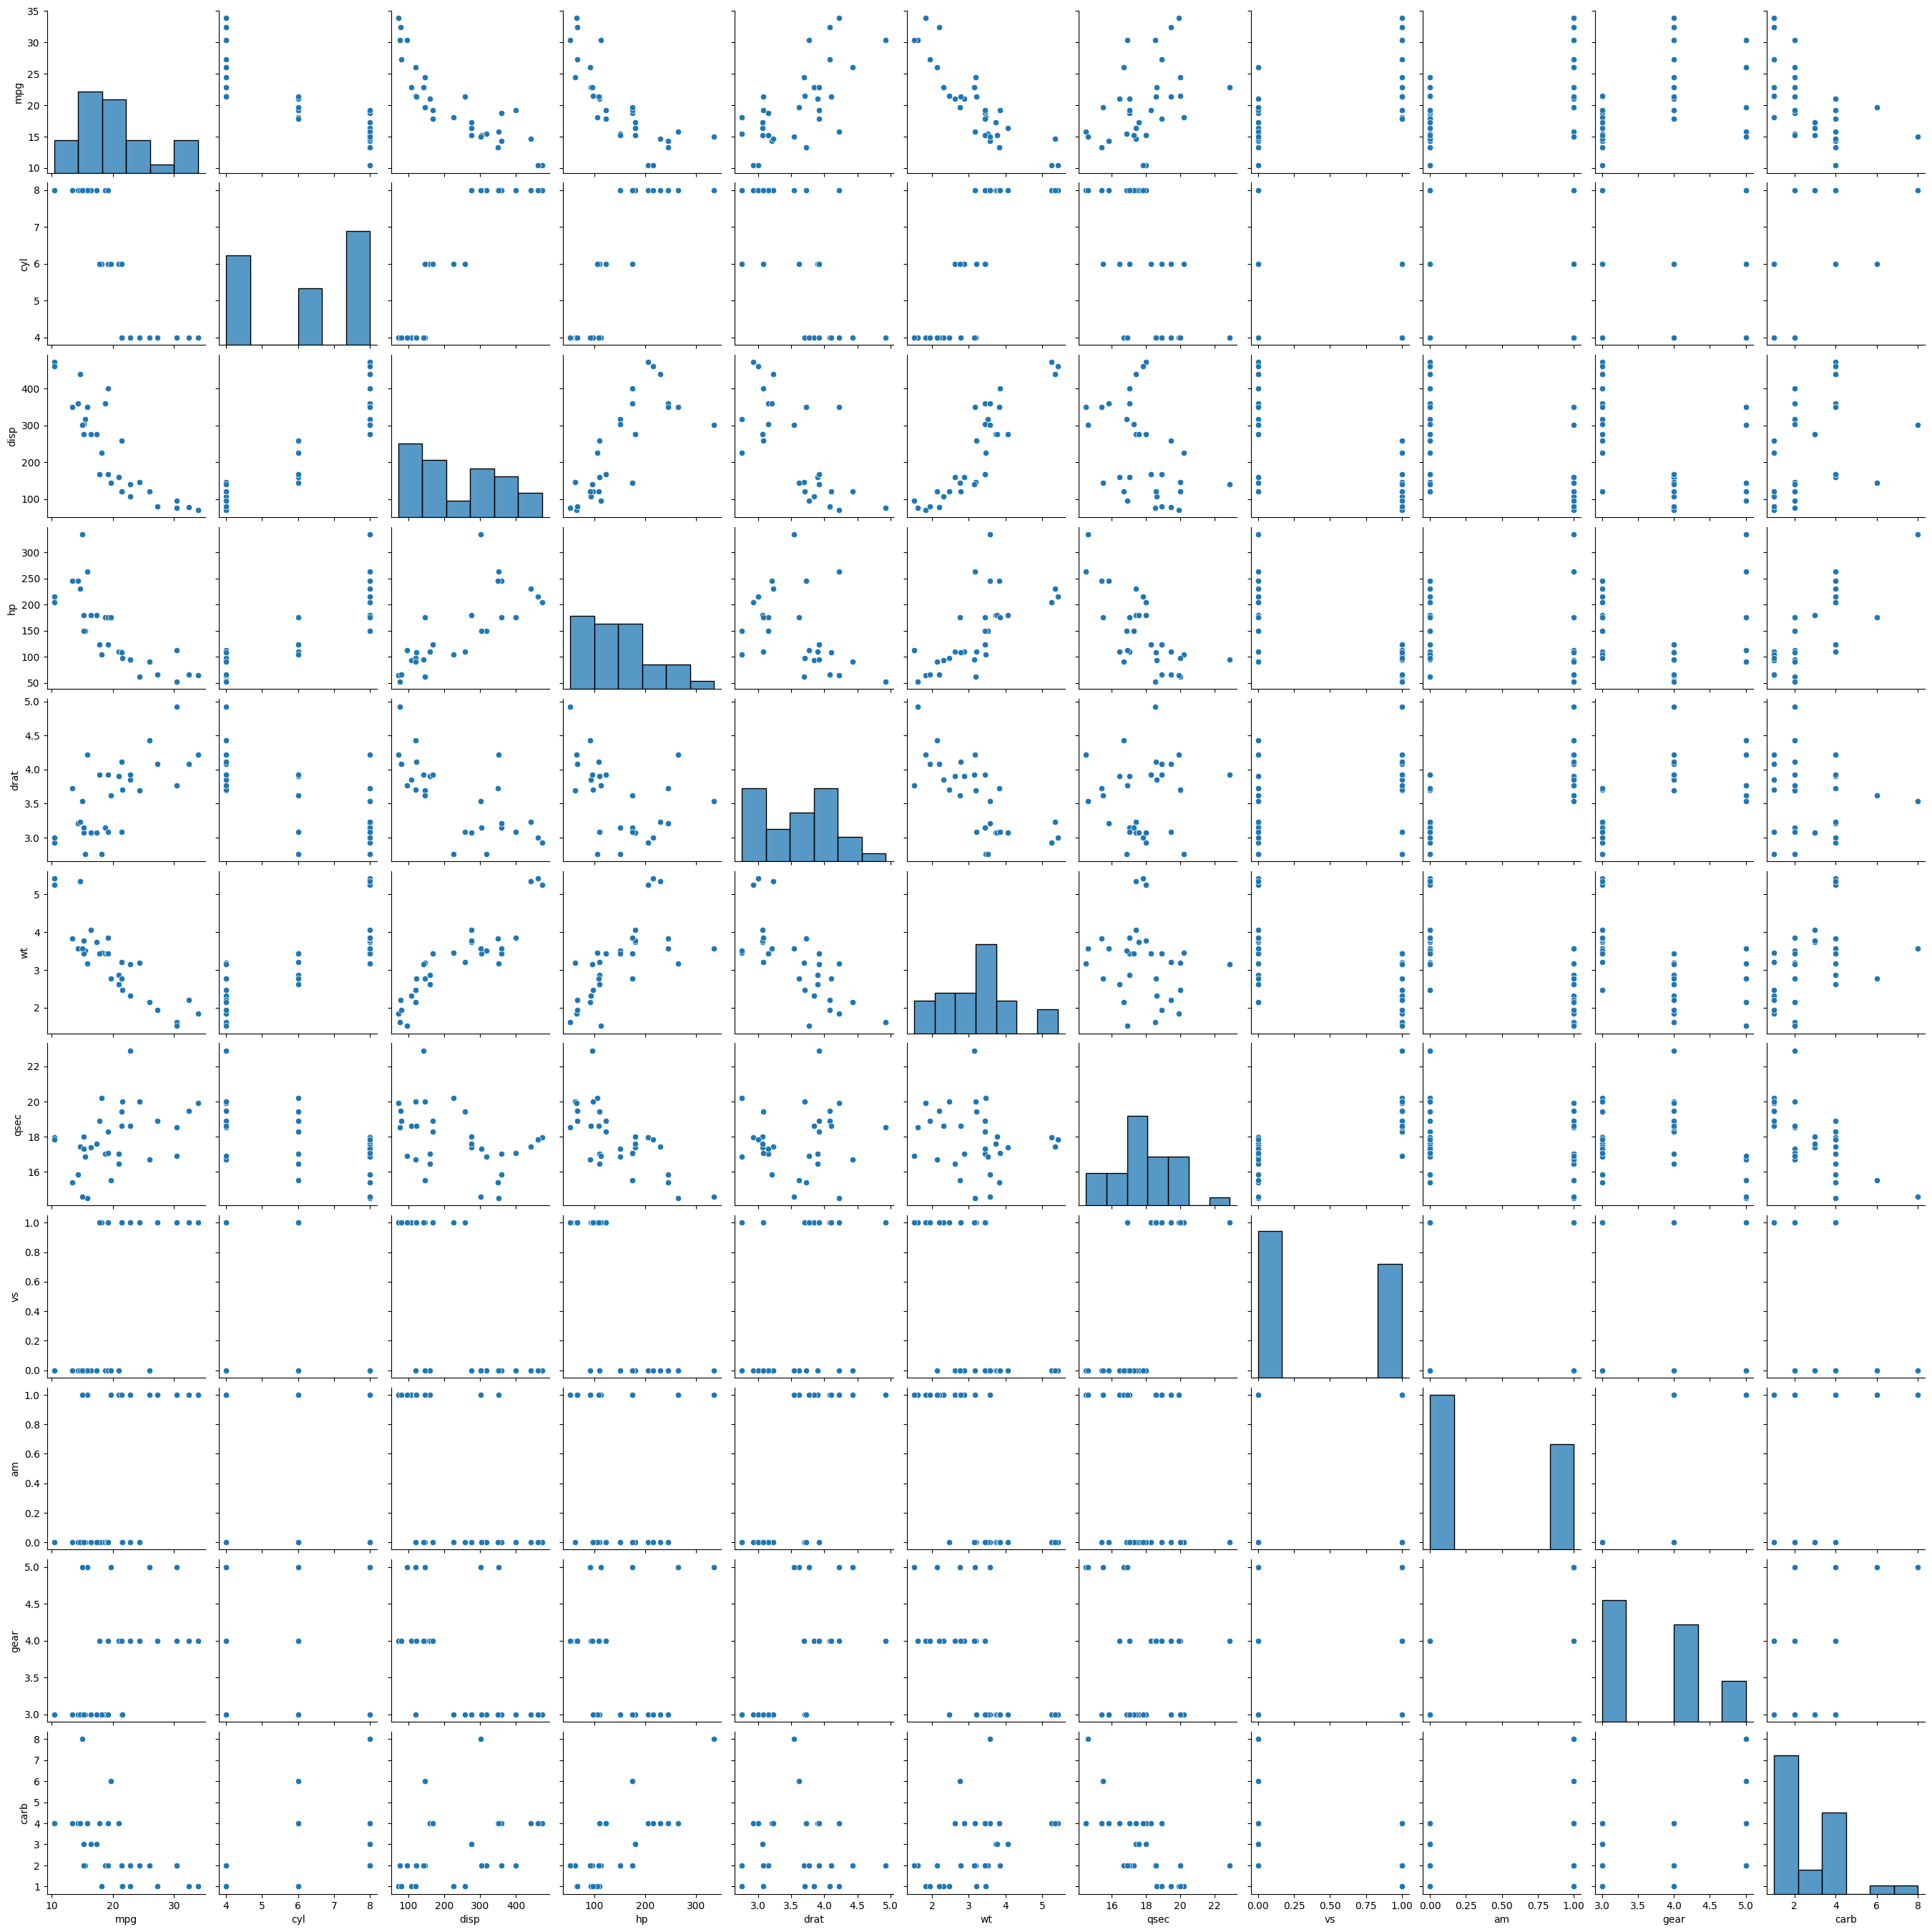

In [17]:
temp = df_full.drop('model', axis=1)
sns.pairplot(temp)

In [18]:
reg = LinearRegression().fit(X, Y)

In [19]:
print(f'{reg.intercept_[0]} + {reg.coef_[0][0]}*X1 + {reg.coef_[0][1]}*X2')

-5.593700289851597 + -0.4762499019891327*X1 + 0.01831107045380651*X2


In [20]:
x1i = int(input('enter x1:'))
x2i = int(input('enter x2:'))
x3i = int(input('enter x3:'))
x4i = int(input('enter x4:'))
x5i = int(input('enter x5:'))
x6i = int(input('enter x6:'))
x7i = int(input('enter x7:'))
x8i = int(input('enter x8:'))
x9i = int(input('enter x9:'))
x10i = int(input('enter x10:'))
x = np.array([[x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x9i, x10i]])
y_pred = reg.predict(x)
print(f'predicted value:{y_pred}')

predicted value:[[20.80636534]]


c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
test_x = test.drop('mpg', axis=1)
test_x = test_x.drop('model', axis=1)
test_x = pd.DataFrame(test_x)
predictions = reg.predict((test_x))
mse = mean_squared_error(test['mpg'], predictions)
print(f'mse = {mse}')

mse = 10.130154667787284


### 3. Polynomial regression on mtcars

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
X = df['x']
X = np.array(X)
Y = df['y']
Y = np.array(Y)

In [25]:
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y)

LinearRegression()

In [26]:
y_predicted = poly_reg_model.predict(poly_features)

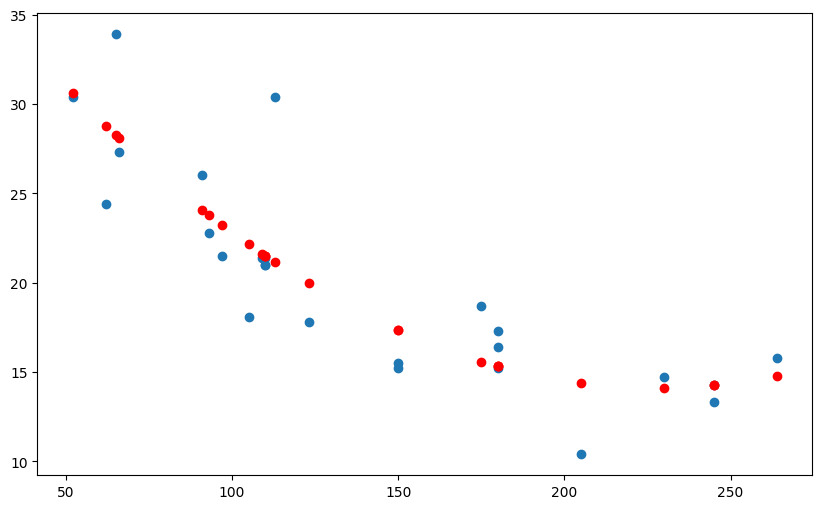

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.scatter(X, y_predicted, c="red")
plt.show()

In [28]:
mse = mean_squared_error(test['mpg'], poly_reg_model.predict(poly.fit_transform(np.array(test['hp']).reshape(-1, 1))))
print(f'mse = {mse}')

mse = 13.079198205095379


### 4. Logistic regression on mtcars

In [29]:
X = df['x']
X = np.array(X)
X = X.reshape((-1,1))
Y = train['vs']
Y = np.array(Y)
Y = Y.reshape((-1,1))

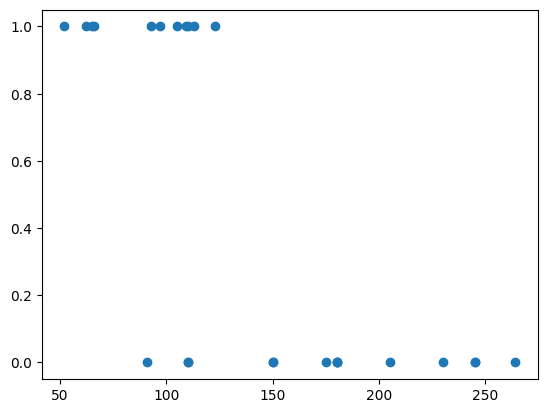

In [30]:
plt.scatter(X,Y)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logisticRegr = LogisticRegression()

In [33]:
logisticRegr.fit(X, Y)

c:\Users\s_ani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
xi = int(input('enter horsepower:'))
y_p = logisticRegr.predict(np.array(xi).reshape((-1,1)))
print(y_p)

[0]


In [34]:
predictions = logisticRegr.predict(np.array(test['hp']).reshape((-1,1)))

In [35]:
score = logisticRegr.score(np.array(test['hp']).reshape((-1,1)), np.array(test['vs']).reshape((-1,1)))
print(f'accuracy = {score}')

accuracy = 0.8571428571428571


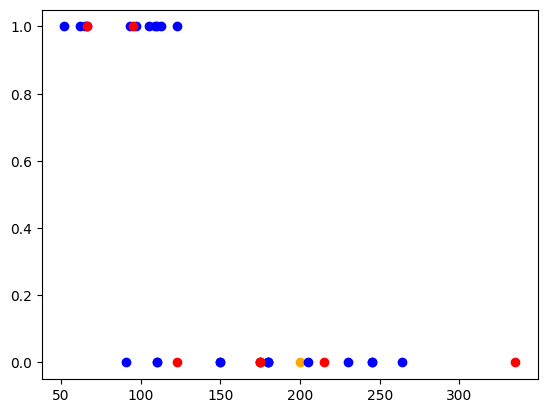

In [42]:
plt.scatter(xi, y_p, c='orange')
plt.scatter(X,Y,c='blue')
plt.scatter(test['hp'],predictions,c='red')